In [141]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from learning.utils import write_params
from learning.algorithms import scheduling, scheduling_c

system_name = 'sarsa_turbo'
run_name = 'state_of_art'
data_dir = './data/' + system_name + '/' + run_name + '/'
#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

In [142]:
names_list = ['sarsa_const', 'sarsa_lin', 'sarsa_turbo', 'dql_const', 'dql_lin', 'dql_turbo']
if system_name not in names_list:
    print('Warning: invalid system name')

## Environment

### General parameters

In [143]:
params = dict()

# TIME
params['integration_step'] = 0.001 # sec
params['episode_duration'] = 300 # sec
params['learning_step'] = 0.2 # sec

# PENALTY
params['penalty'] = 10 # kWh

### Wind

In [144]:
# CONSTANT WIND
if system_name == 'sarsa_const' or system_name == 'dql_const':
    params['wind_type'] = 'const' # 'const' for constant, 'stream' for the stream function
    params['v_wind_x'] = 10 # m/sec
    params['v_wind_y'] = 0 # m/sec
    params['v_wind_z'] = 0 # m/sec
    
# LINEAR PROFILE
elif system_name == 'sarsa_lin' or system_name == 'dql_lin':
    params['wind_type'] = 'lin'
    params['v_ground'] = 4.625 # m/sec
    params['v_ang_coef'] = 0.125

# TURBULENCE
elif system_name == 'sarsa_turbo' or system_name == 'dql_turbo':
    params['wind_type'] = 'turbo'

else:
    print('Invalid environment')

## Algorithm

### Algorithm type

In [145]:
# SARSA ALGORITHM
if system_name == 'sarsa_const' or system_name == 'sarsa_lin' or system_name == 'sarsa_turbo':
    params['learning_type'] = 'sarsa'

# DEEP Q-LEARNING
elif system_name == 'dql_const' or system_name == 'dql_lin' or system_name == 'dql_turbo':
    params['learning_type'] = 'dql'

else:
    print('Warning: invalid system name')

### General parameters

In [146]:
# DISCOUNT FACTOR
params['gamma'] = 1

# TIME
#params['episodes'] = 1000
params['max_steps'] = 10000000

if 'episodes' in params:
    max_steps=int(params['episodes']*params['episode_duration']/params['learning_step'])
else:
    max_steps=params['max_steps']

print(max_steps)

# LEARNING RATE
params['eta0'] = 1e-1
params['eta_decay_start'] = 10
params['eta_decay_rate'] = 0.6
params['eta_c'] = 200




# EXPLORATION
params['eps0'] = 0.01
params['eps_decay_start'] = 8000000
params['eps_decay_rate'] = 1.3
params['eps_c'] = 1



# OPTIMIZER
if params['learning_type'] == 'dql':
    params['optimizer'] = 'adam'
    params['loss'] = 'mse'

10000000


In [147]:
# INITIAL CONDITIONS
params['max_power'] = 0

In [148]:
# WRITING THE PARAMETERS
write_params(params, data_dir, "parameters.txt")

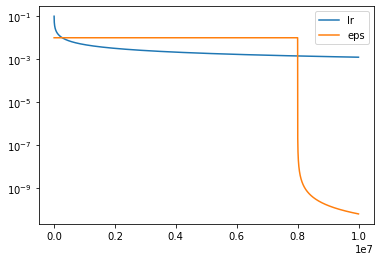

In [149]:
plt.semilogy(range(0,max_steps,1000), [scheduling_c(params['eta0'], i, params['eta_decay_start'], params['eta_decay_rate'], params['eta_c']) 
          for i in range(0,max_steps,1000)], label = 'lr')

plt.semilogy(range(0,max_steps,1000), [scheduling_c(params['eps0'], i, params['eps_decay_start'], params['eps_decay_rate'], params['eps_c']) 
          for i in range(0,max_steps,1000)], label = 'eps')

plt.legend()
plt.savefig(data_dir+"lr_eps.png")    
plt.show()